In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import cv2
import tarfile

In [4]:
#with tarfile.open('PKLot.tar', 'r') as tar:
#    tar.extractall()

## Using PIL library

In [5]:
# Have a look at the images
img_path = '../data/PKLot/PKLot/UFPR04/Sunny/2012-12-24/'

imge = '2012-12-24_07_55_03.jpg'
imge_xml = '2012-12-24_07_55_03.xml'

img = Image.open(img_path+imge)

In [6]:
''' 
# Display information about the image
print(f"Image format: {img.format}")
print(f"Image mode: {img.mode}")
print(f"Image size: {img.size}")

# Show the image
img.show()

'''

' \n# Display information about the image\nprint(f"Image format: {img.format}")\nprint(f"Image mode: {img.mode}")\nprint(f"Image size: {img.size}")\n\n# Show the image\nimg.show()\n\n'

## Using OpenCV

Image shape: (720, 1280, 3)
Image data type: uint8


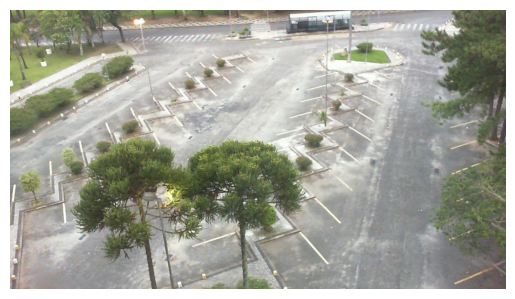

In [7]:
# Read the image
imgocv = cv2.imread(img_path+imge)

# Display information about the image
print(f"Image shape: {imgocv.shape}")
print(f"Image data type: {imgocv.dtype}")

# Convert the image from BGR to RGB (OpenCV uses BGR by default)
img_rgb = cv2.cvtColor(imgocv, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(img_rgb)

plt.axis('off')  # Turn off axis labels
plt.show()

In [8]:
# Specify the path to your XML file
xml_file_path = img_path+imge_xml

# Parse the XML file
tree = ET.parse(xml_file_path)
root = tree.getroot()

# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')

    rotated_rect = space_element.find('.//rotatedRect')
    center = rotated_rect.find('center')
    center_x = center.get('x')
    center_y = center.get('y')

    contour = space_element.find('.//contour')
    points = contour.findall('point')

    # Process the extracted information
    print(f"Space ID: {space_id}")
    print(f"Occupied: {occupied}")
    print(f"Center: ({center_x}, {center_y})")

    # Extract and print contour points
    print("Contour points:")
    for point in points:
        point_x = point.get('x')
        point_y = point.get('y')
        print(f"  Point: ({point_x}, {point_y})")

    print("\n---\n")

Space ID: 1
Occupied: 0
Center: (724, 623)
Contour points:
  Point: (720, 549)
  Point: (805, 665)
  Point: (715, 698)
  Point: (644, 582)

---

Space ID: 2
Occupied: 0
Center: (774, 511)
Contour points:
  Point: (769, 451)
  Point: (849, 534)
  Point: (789, 586)
  Point: (701, 489)

---

Space ID: 3
Occupied: 0
Center: (812, 445)
Contour points:
  Point: (806, 399)
  Point: (879, 466)
  Point: (823, 499)
  Point: (747, 425)

---

Space ID: 4
Occupied: 0
Center: (836, 368)
Contour points:
  Point: (829, 323)
  Point: (900, 383)
  Point: (862, 430)
  Point: (771, 356)

---

Space ID: 5
Occupied: 0
Center: (865, 317)
Contour points:
  Point: (850, 282)
  Point: (918, 322)
  Point: (891, 368)
  Point: (810, 311)

---

Space ID: 6
Occupied: 0
Center: (885, 266)
Contour points:
  Point: (863, 231)
  Point: (938, 271)
  Point: (909, 309)
  Point: (832, 262)

---

Space ID: 7
Occupied: 0
Center: (903, 226)
Contour points:
  Point: (884, 194)
  Point: (956, 231)
  Point: (928, 265)
  Point: (8

In [9]:
img_rgb_cont = img_rgb.copy()

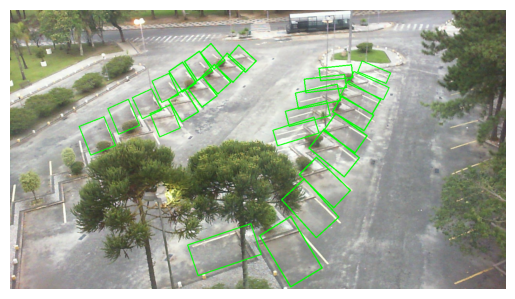

In [10]:
# Iterate over each space in the parking lot
for space_element in root.findall('.//space'):
    space_id = space_element.get('id')
    occupied = space_element.get('occupied')
    center = space_element.find('.//rotatedRect/center')
    center_x = int(float(center.get('x')))
    center_y = int(float(center.get('y')))

    # Print extracted information
    #print(f"\nSpace ID: {space_id}")
    #print(f"Occupied: {occupied}")
    #print(f"Center: ({center_x}, {center_y})")

    # Attempt to find the <contour> element directly under <space>
    contour_element = space_element.find('.//contour')
    
    if contour_element is not None:
        # Attempt to find <point> elements under <contour>
        contour_points = contour_element.findall('point')
        
        # Print the path to contour points
        #print(f"Contour points path: .//contour/point")
        
        # Print number of contour points
        #print(f"Number of contour points: {len(contour_points)}")

        # Convert the list of points to a numpy array
        points_array = np.array([(int(point.get('x')), int(point.get('y'))) for point in contour_points], dtype=np.int32)

        # Check if enough points are available
        if len(points_array) >= 3:
            # Calculate the bounding box coordinates
            rect = cv2.minAreaRect(points_array)
            box = cv2.boxPoints(rect)
            box = box.astype(int)

            # Print bounding box coordinates
            #print("Box:", box)

            # Draw the bounding box on the copied image
            cv2.drawContours(img_rgb_cont, [box], 0, (0, 255, 0), 2)
        else:
            print("Error: Not enough points for bounding box.")
    else:
        print("Error: <contour> element not found for the space.")

# Display the image with bounding boxes
plt.imshow(img_rgb_cont)
plt.axis('off')  # Turn off axis labels
plt.show()